<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

$\widehat{w} = (X^T X)^{-1}X^T y,$

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 

# verificar datasets disponibles para usar.
# list_available_datasets()

# Obtener el dataset por ID 9, alternativamente, por nombre ‘Auto MPG’.
# MPG: Millas por galón, una medida para vehículos que indica cuántas millas puede recorrer un automóvil utilizando un galón de combustible.
auto_mpg = fetch_ucirepo(id=9)

# extrae las características `X`` y la variable objetivo `y`` como pandas DataFrames.
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [3]:
from IPython.display import display

# muestra los detalles de los metadatos del dataset.
display(auto_mpg.metadata)

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
# muestra las variables del dataset.
display(auto_mpg.variables)

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [5]:
# muestra las primeras cinco filas del DataFrame de características
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [6]:
# muestra las primeras cinco filas del DataFrame de la variable objetivo.
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [7]:
# muestra el dataset original antes de cualquier preprocesamiento, como un pandas DataFrame.
display(auto_mpg.data.original)

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [8]:
# una tupla con (filas, columnas) del DataFrame de características.
X.shape

(398, 7)

In [9]:
# una tupla con (filas, columnas) del DataFrame de la variable objetivo
y.shape

(398, 1)

In [10]:
#  resumen del DataFrame de características, incluyendo los tipos de datos de las columnas y los conteos de valores no nulos.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [11]:
# resumen de estadísticas
display(X.describe())  

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

In [12]:
import pandas as pd

def remove_nan_values_if_needed(X, y):
    """
     Elimina los valores NaN de los datos de características y objetivo si están presentes.

    Parameters:
        X (pandas.DataFrame): Los datos de características que serán limpiados.
        y (pandas.DataFrame o pandas.Series): Los datos objetivo que serán limpiados.

    Return:
        tuple: Una tupla que contiene:
            - x_clean (numpy.ndarray): Los datos de características limpiados sin valores NaN.
            - y_clean (numpy.ndarray): Los datos objetivo limpiados sin valores NaN.
    """
    x_clean = X
    y_clean = y

    # si hay valores NaN en `X` o `y`
    if X.isna().any().any() or y.isna().any().any():
        # combina `X` y `y` en un DataFrame temporal y elimina los NaN
        data_x_y = pd.DataFrame(X)
        data_x_y['target'] = y
        data_x_y = data_x_y.dropna()

        # todas las columnas de `X` excepto `y` (características)
        x_clean = data_x_y.iloc[:, :-1].values
        # la columna `y` (objetivo)
        y_clean = data_x_y.iloc[:, -1].values

    return x_clean, y_clean

In [13]:
import matplotlib.pyplot as plt

def visualize_data_and_regression(X, y, title, xlabel, ylabel, y_pred=None, X_reg=None):
    """
    Dibujar un gráfico de dispersión entre una matriz de características y el vector objetivo con una línea de regresión opcional.

    Parameters:
        X (pandas.DataFrame): Los datos de las características para el eje X.
        y (pandas.DataFrame or pandas.Series): Los datos del objetivo para el eje Y.
        title (str): Titulo para el gráfico.
        xlabel (str): Etiqueta para el eje X del gráfico.
        ylabel (str): Etiqueta para el eje Y del gráfico.
        y_pred (optional array): Valores objetivo predichos para superponer una línea de regresión. Por defecto es None.    
        X_reg: X (pandas.DataFrame): Los datos de las características para el eje X de la línea de regresión.
    """
    plt.figure(figsize=(10, 6))

    # Dibuja el diagrama de dispersión para los datos originales
    plt.scatter(X, y, color='orange', alpha=0.5, label='Data')

    if X_reg is None:
        X_reg = X

    if y_pred is not None:
        # Dibuja la línea de regresión
        plt.plot(X_reg, y_pred, color='blue', alpha=0.5, linewidth=2, label='Línea de regresión')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

In [14]:
def visualiza(df, y, column_name):
    """
    Visualiza el gráfico de consumo de MPG creando un diagrama de dispersión de la columna especificada 
    contra el vector objetivo.

    Parameters:
        df (pandas.core.frame.DataFrame): La matriz de características que contiene el dataset.
        y (pandas.core.frame.DataFrame or pandas.Series): El vector objetivo asociado con la matriz de características.
        column_name (str): El nombre de la columna en el dataset para seleccionar y visualizar contra el objetivo.
    """
    if isinstance(df, pd.DataFrame) and isinstance(y, pd.DataFrame):
        X, y = remove_nan_values_if_needed(df[[column_name]], y)
        visualize_data_and_regression(X, y, 'Gráfico de Dispersión', column_name, 'MPG')

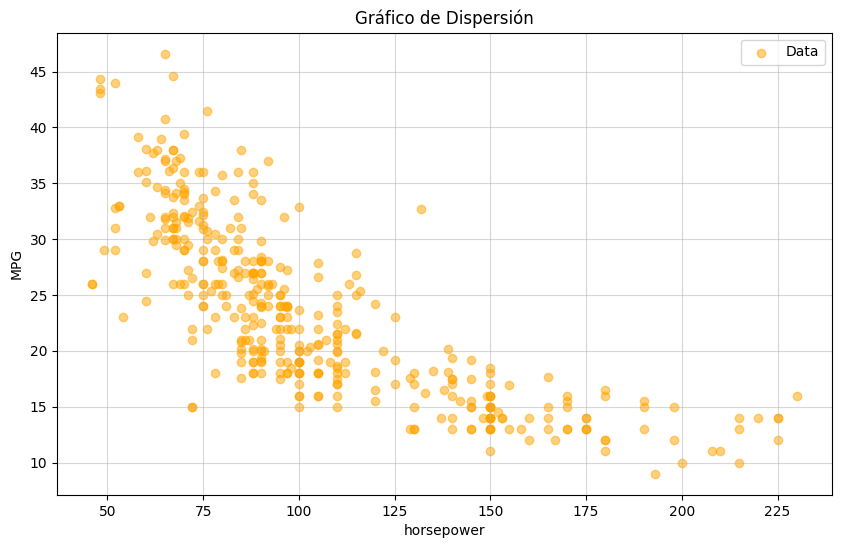

In [15]:
# crear un gráfico de dispersión que muestra la relación entre la columna `horsepower` (caballos de fuerza) y el consumo de combustible medido en MPG (Millas por Galón).
visualiza(X, y, 'horsepower')

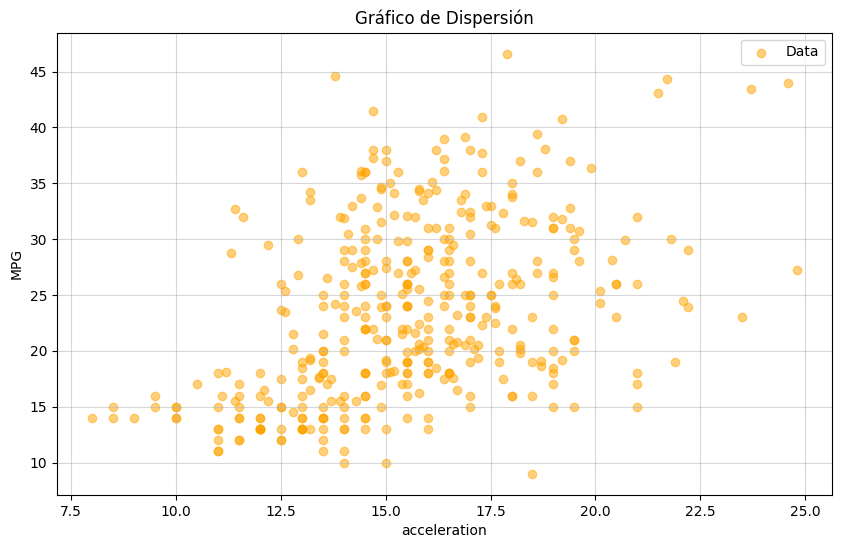

In [16]:
# crear un gráfico de dispersión que muestra la relación entre la columna `acceleration`` (aceleración) y el consumo de combustible medido en MPG (Millas por Galón).
visualiza(X, y, 'acceleration')

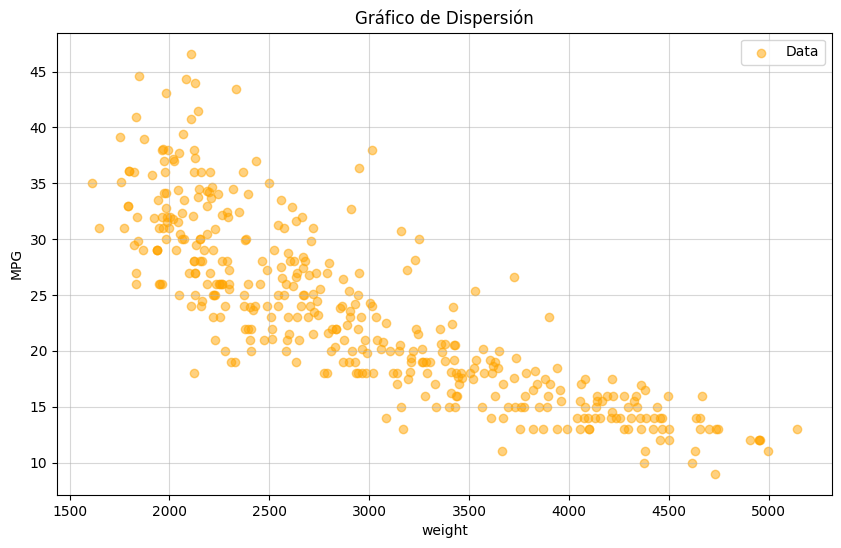

In [17]:
# crear un gráfico de dispersión que muestra la relación entre la columna `weight` (peso) y el consumo de combustible medido en MPG (Millas por Galón).
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [18]:
import numpy as np

def is_valid_matrix(matrix):
    """
    Verifica si una matriz dada es un array de numpy válido con dimensiones correctas.

    Parameters:
        matrix (numpy.ndarray): La matriz a validar.

    Return:
        bool: `True` si la matriz es un array de numpy válido, contiene elementos
        y tiene 1 o 2 dimensiones, `False` en caso contrario.
    """

    return isinstance(matrix, np.ndarray) and matrix.size > 0 and (matrix.ndim == 1 or matrix.ndim == 2)

In [19]:
# crear función para calcular el peso de los mínimos cuadrados
def pesos_ols(X, y):
    """
    Calcular los pesos para la regresión de mínimos cuadrados y devolver las predicciones.

    Parameters:
        X (numpy.ndarray): La matriz de características para la regresión.
        y (numpy.ndarray): El vector objetivo para la regresión.

    Return:
        tuple: Una tupla que contiene:
            - W (numpy.ndarray): Los pesos calculados utilizando el método de minimos cuadrados.
            - y_pred (numpy.ndarray): Los valores objetivo previstos basados en los pesos calculados.
    """
    w = None
    # asegurars de que las dimensiones son correctas
    if is_valid_matrix(X) and is_valid_matrix(y):
        # convertir `y` a columna vector cuando es un vector fila
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        # transpuesta de `X` cuando la matrix tiene mas características que observaciones (filas)
        if X.shape[1] > X.shape[0]:
            X = X.T

        # añade una columna de `1` como el término de sesgo (bias).
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # calcular los pesos utilizando la fórmula matricial
        W = np.linalg.inv(X.T @ X) @ X.T @ y
    
        # calcula las predicciones utilizando los pesos calculados
        y_pred = X @ W

    return W, y_pred

In [20]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

(array([[-2.29223802e+06],
        [ 5.92536529e+01],
        [ 1.20780450e+03]]),
 array([[228318.13982552],
        [169161.78182553],
        [230405.80844587],
        [122446.11939337],
        [253610.50894067],
        [195619.82361601],
        [228577.88587914],
        [214600.39292671],
        [145148.44960912],
        [113511.08953798]]))

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [21]:
def visualize_linear_regression_ols(df, y, column_name):
    """
    Visualiza una regresión lineal utilizando un DataFrame de características y una variable objetivo.

    Parameters:
        df (pandas.DataFrame): El DataFrame que contiene las características.
        y (pandas.DataFrame): El DataFrame que contiene la variable objetivo.
        column_name (str): El nombre de la columna en `df` que será utilizada como característica.

    Return:
        Genera una visualización de la regresión lineal como salida.
    """
    if isinstance(df, pd.DataFrame) and isinstance(y, pd.DataFrame):
        # elimina valores nan
        X, y = remove_nan_values_if_needed(df[[column_name]], y)

        # calcula los pesos de regresión lineal y las predicciones
        _, y_pred = pesos_ols(X.values, y.values)

        # visualiza los datos originales, las predicciones y la relación entre ellos
        visualize_data_and_regression(X, y, 'Regresión Lineal con Mínimos Cuadrados', column_name, 'MPG', y_pred)

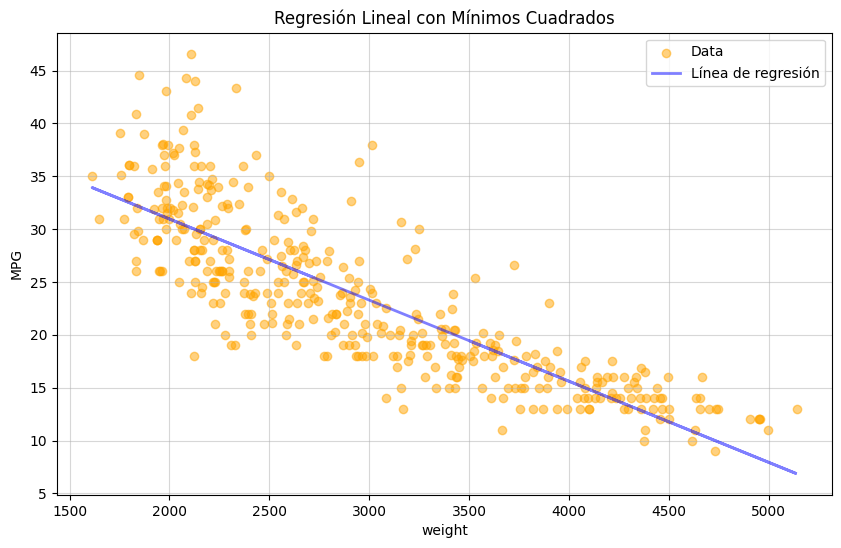

In [22]:
visualize_linear_regression_ols(auto_mpg.data.features, auto_mpg.data.targets, 'weight')

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [23]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


### Comparison of Results: OLS vs Sklearn

El resultado obtenido con visualize_linear_regression en minimos cuadrados o OLS está escrito en formato exponencial, mientras que el resultado de la versión de Sklearn está escrito en formato decimal. Ambos son casi idénticos, y la diferencia menor probablemente se deba a la precisión numérica.

|Metric   |OLS (Exponential Format)|Sklearn (Decimal Format)|Conversion  (almost identical results)         |
|---------|------------------------|------------------------|-----------------------------------------------|
|Intercept|$$4.63173644e+01$$      |$$46.31736442$$         |$$4.63173644 \times 10^1 = 46.3173644$$        |
|Slope    |$$-7.67661006e-03$$     |$$-0.00767661$$         |$$-7.67661006 \times 10^{-3} = -0.00767661006$$|

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

El método de mínimos cuadrados busca encontrar, de manera rápida y precisa la línea recta que mejor se ajusta a un conjunto de puntos en el plano cartesiano.  Esto se logra calculando los coeficientes óptimos para la pendiente y el intercepto en el eje `y`, minimizando la suma de las distancias al cuadrado entre los puntos observados y la línea de regresión. En este caso, la pendiente indica qué tan inclinada está la línea y en qué dirección va. Este coeficiente indica cuánto cambia la variable dependiente `y` por cada unidad que cambia la variable independiente `X`, en otras palabras, cuánto sube o baja la línea por cada unidad que avanzamos en el eje `X`. A su vez, el intercepto en el eje `y` se refiere a dónde cruza la línea el eje Y cuando X = 0, es decir, el punto de inicio de la línea en el eje Y.

Por el contrario, el método del descenso por gradiente busca encontrar dicha línea de manera iterativa. Comienza con una línea en una posición aleatoria, que se ajusta gradualmente en la dirección que minimiza el error, evaluando qué tan alejados están los puntos de la línea. Este proceso se repite hasta acercarse lo más posible a la línea óptima.

En el descenso por gradiente, hay dos aspectos clave: la elección del tamaño de los pasos o la tasa de aprendizaje, ya que determina la rapidez con la que se alcanza la convergencia; y el tipo de función. El método funciona mejor con funciones convexas, ya que garantizan que el algoritmo converja al mínimo global. Sin embargo, en funciones no convexas, el algoritmo puede quedar atrapado en un mínimo local, lo que significa que el resultado final no será óptimo.


## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [24]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    """
    Implementa el descenso del gradiente para regresión lineal.
    
    Parameters:
        X (np.ndarray): Matriz de características.
        y (np.ndarray): Vector objetivo.
        w0 (np.ndarray): Punto inicial para los coeficientes w.
        n_iter (int): Número de iteraciones del algoritmo.
        eta (float): Tasa de aprendizaje.
    
    Returns:
        w (np.ndarray): Array con los coeficientes w en cada iteración.
        losses (list): Lista con el valor de la función de pérdida en cada iteración.
    """
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables

    # Inicializa los pesos (w) y lista de pérdidas (losses)

    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # Validaciones y añade la columna de 1s
    if is_valid_matrix(X) and is_valid_matrix(y):
        # convertir `y` a columna vector si es un vector fila
        if y.ndim == 1:
            print("entra 1")
            y = y.reshape(-1, 1)
            
        # transpuesta de `X` si la matrix tiene mas características que observaciones (filas)
        if X.shape[1] > X.shape[0]:
            print("entra 2")
            X = X.T

        # añade una columna de `1` con el sesgo (bias).
        X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Buble para las iteraciones y actualizar los pesos
    for i in range(n_iter):
        # Calcular predicciones
        y_pred = X @ w
        
        # Calcular error y función de pérdida y añadirlos a la lista de perdidas
        error = y_pred - y
        loss = np.mean(error ** 2)
        loss_iter.append(loss)
        
        # Calcular gradiente
        gradient = (2 / X.shape[0]) * X.T @ error
        
        # Aañadirlos los pesos a la lista de pesos
        w = w - eta * gradient
        w_iter.append(w)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)

In [25]:
# Usamos el algoritmo para los siguientes parametros

eta = 0.01
iteraciones = 2000
np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, _ = gradient_descent(X, y, w0, iteraciones, eta)
print(weights[-1])

[[183844.99464097]
 [ 40417.13664575]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
column_name = 'weight'
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

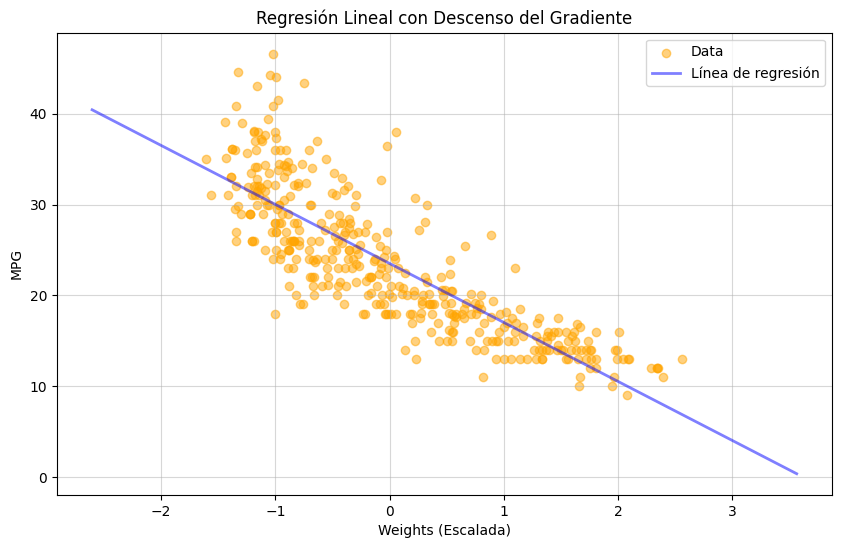

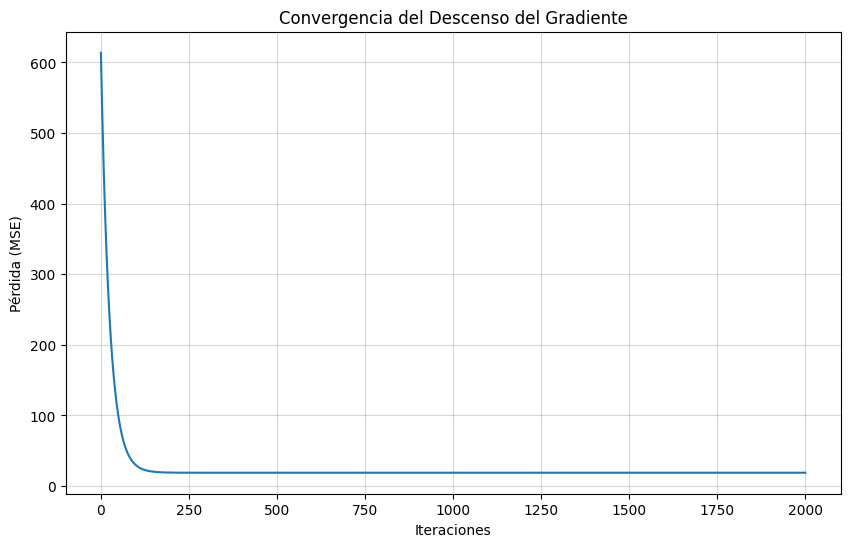

In [27]:
# Escalamos la variable X
X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# Punto inicial, learning rate e iteraciones
w_init = np.random.rand(2, 1) * 0.01
eta = 0.01
iteraciones = 2000

# Aplicamos el algoritmo, `weights`` son los pesos finales y `loss` es la lista de pérdidas
weights, loss = gradient_descent(X_gd, y_gd, w_init, iteraciones, eta)

# print(X_gd.shape)
# print(X_gd)
# print(weights.ndim)

# Si weights tiene demasiadas dimensiones
if weights.ndim > 2:
    weights = weights[-1]  # Tomar los pesos finales de las iteraciones
    # print("weights ajustado", weights)

# Límites del eje X para la gráfica
X_max = np.max(X_gd) + 1
X_min = np.min(X_gd) - 1

# Rango para predicciones con 100 puntos entre X_min y X_max
X_range = np.linspace(X_min, X_max, 100).reshape(-1, 1)

# Agregar bias y generar predicciones en el rango
X_range_bias = np.hstack((np.ones((X_range.shape[0], 1)), X_range))

# Verificar las formas antes de la multiplicación
# print("Shape de X_range_bias: ", X_range_bias.shape)
# print("Shape de weights: ", weights.shape)

# Multiplicación para obtener las predicciones
y_pred = X_range_bias @ weights
# print("y_pred", y_pred.shape)
# print("X_range", X_range.shape)

# Graficar datos reales y línea de regresión
plt.clf()
plt.close('all')
visualize_data_and_regression(X_gd, y_gd, 'Regresión Lineal con Descenso del Gradiente', 'Weights (Escalada)', 'MPG', y_pred, X_range)

# Dibuja la gráfica de Convergencia
plt.clf()
plt.close('all')
plt.figure(figsize=(10, 6))
plt.plot(loss)
plt.title("Convergencia del Descenso del Gradiente")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (MSE)")
plt.grid(alpha=0.5)
plt.show()